# dropout降低过拟合

每一轮训练中：走到某一层时，随机删除某些神经元（没删除的依旧保持全连接）
- 训练多少轮，相当于训练出多少种神经网络！然后对这些网络结果取平均；
- 减少神经元之间复杂的“共适应关系”：两个神经元不一定每次都在dropout后的网络中，所以权重的更新不再依赖具有固定关系的隐含节点的共同作用，阻止了“某些特征”仅在“其他特征下”才有效果的情况。

keras把dropout的功能，直接当成“层”来用了，跟在需要dropout操作的层后面加一个dropout层即可。

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/credit-a.csv', header = None)

In [3]:
x = data.iloc[:,:-1].values  
y = data.iloc[:, -1].replace(-1,0).values # 因为二分类用sigmoid函数的范围是[0,1]，把-1换成0最好
y = y.reshape(-1,1)   # (-1,1) = (653,1) 

In [4]:
# 3:1 划分：
x_train = x[ :int( len(x)*0.75 ) ]
x_test = x[ int( len(x)*0.75 ): ]
y_train = y[ :int( len(x)*0.75 ) ]
y_test = y[ int( len(x)*0.75 ): ]

# 多层网络搭建

In [5]:
model = keras.Sequential()

In [6]:
from keras import layers

In [7]:
# 每一个dense层后加一个dropout层即可；dropout层有个参数：杀死多少神经元(0-1)
model.add( layers.Dense(128, input_dim=15, activation = 'relu' ) )
model.add( layers.Dropout(0.6) )  # 随机杀死60%
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dropout(0.6) )
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dropout(0.6) )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [9]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
history = model.fit( x_train, y_train, epochs = 1000, validation_data=(x_test, y_test) )


Train on 489 samples, validate on 164 samples
Epoch 1/1000
489/489 [==============================] - 1s 1ms/step - loss: 130.0146 - acc: 0.5031 - val_loss: 9.4589 - val_acc: 0.3659
Epoch 2/1000
489/489 [==============================] - 0s 107us/step - loss: 43.0563 - acc: 0.5010 - val_loss: 8.7583 - val_acc: 0.6463
Epoch 3/1000
489/489 [==============================] - 0s 138us/step - loss: 40.4947 - acc: 0.5297 - val_loss: 10.1914 - val_acc: 0.6707
Epoch 4/1000
489/489 [==============================] - 0s 145us/step - loss: 30.6116 - acc: 0.5849 - val_loss: 9.2779 - val_acc: 0.6707
Epoch 5/1000
489/489 [==============================] - 0s 172us/step - loss: 43.7930 - acc: 0.5460 - val_loss: 9.0199 - val_acc: 0.6768
Epoch 6/1000
489/489 [==============================] - 0s 178us/step - loss: 33.9312 - acc: 0.5787 - val_loss: 8.8174 - val_acc: 0.6768
Epoch 7/1000
489/489 [==============================] - 0s 164us/step - loss: 57.1911 - acc: 0.5419 - val_loss: 8.2249 - val_acc: 0

Epoch 59/1000
489/489 [==============================] - 0s 153us/step - loss: 6.1886 - acc: 0.5930 - val_loss: 0.7107 - val_acc: 0.7073
Epoch 60/1000
489/489 [==============================] - 0s 129us/step - loss: 4.9676 - acc: 0.6278 - val_loss: 0.6501 - val_acc: 0.7256
Epoch 61/1000
489/489 [==============================] - 0s 141us/step - loss: 4.7545 - acc: 0.6258 - val_loss: 0.6201 - val_acc: 0.7256
Epoch 62/1000
489/489 [==============================] - 0s 138us/step - loss: 3.9042 - acc: 0.6217 - val_loss: 0.5851 - val_acc: 0.7500
Epoch 63/1000
489/489 [==============================] - 0s 155us/step - loss: 6.6963 - acc: 0.6483 - val_loss: 0.5697 - val_acc: 0.7561
Epoch 64/1000
489/489 [==============================] - 0s 151us/step - loss: 9.9948 - acc: 0.6626 - val_loss: 0.7333 - val_acc: 0.7195
Epoch 65/1000
489/489 [==============================] - 0s 135us/step - loss: 6.2290 - acc: 0.5828 - val_loss: 0.6665 - val_acc: 0.7256
Epoch 66/1000
489/489 [==================

489/489 [==============================] - 0s 137us/step - loss: 0.9244 - acc: 0.6708 - val_loss: 0.6352 - val_acc: 0.6463
Epoch 178/1000
489/489 [==============================] - 0s 135us/step - loss: 0.8021 - acc: 0.6708 - val_loss: 0.6386 - val_acc: 0.6463
Epoch 179/1000
489/489 [==============================] - 0s 138us/step - loss: 0.9209 - acc: 0.6708 - val_loss: 0.6237 - val_acc: 0.6585
Epoch 180/1000
489/489 [==============================] - 0s 160us/step - loss: 1.3824 - acc: 0.6912 - val_loss: 0.5518 - val_acc: 0.7439
Epoch 181/1000
489/489 [==============================] - 0s 136us/step - loss: 1.2165 - acc: 0.6871 - val_loss: 0.5473 - val_acc: 0.7439
Epoch 182/1000
489/489 [==============================] - 0s 145us/step - loss: 0.8340 - acc: 0.7076 - val_loss: 0.5498 - val_acc: 0.7439
Epoch 183/1000
489/489 [==============================] - 0s 142us/step - loss: 0.9555 - acc: 0.6953 - val_loss: 0.5527 - val_acc: 0.7439
Epoch 184/1000
489/489 [=========================

489/489 [==============================] - 0s 98us/step - loss: 0.8186 - acc: 0.6933 - val_loss: 0.6165 - val_acc: 0.6524
Epoch 296/1000
489/489 [==============================] - 0s 82us/step - loss: 0.7517 - acc: 0.7055 - val_loss: 0.6191 - val_acc: 0.6524
Epoch 297/1000
489/489 [==============================] - 0s 129us/step - loss: 0.6644 - acc: 0.7096 - val_loss: 0.6229 - val_acc: 0.6463
Epoch 298/1000
489/489 [==============================] - 0s 144us/step - loss: 0.5663 - acc: 0.6973 - val_loss: 0.6240 - val_acc: 0.6463
Epoch 299/1000
489/489 [==============================] - 0s 132us/step - loss: 0.5976 - acc: 0.7035 - val_loss: 0.6212 - val_acc: 0.6463
Epoch 300/1000
489/489 [==============================] - 0s 146us/step - loss: 0.6257 - acc: 0.6830 - val_loss: 0.6254 - val_acc: 0.6463
Epoch 301/1000
489/489 [==============================] - 0s 149us/step - loss: 0.7261 - acc: 0.6789 - val_loss: 0.6302 - val_acc: 0.6463
Epoch 302/1000
489/489 [===========================

489/489 [==============================] - 0s 129us/step - loss: 0.5030 - acc: 0.7260 - val_loss: 0.5304 - val_acc: 0.7866
Epoch 414/1000
489/489 [==============================] - 0s 152us/step - loss: 0.5069 - acc: 0.7423 - val_loss: 0.5468 - val_acc: 0.7683
Epoch 415/1000
489/489 [==============================] - 0s 94us/step - loss: 0.5084 - acc: 0.7546 - val_loss: 0.5402 - val_acc: 0.7683
Epoch 416/1000
489/489 [==============================] - 0s 149us/step - loss: 0.5077 - acc: 0.7280 - val_loss: 0.5364 - val_acc: 0.7744
Epoch 417/1000
489/489 [==============================] - 0s 147us/step - loss: 0.5048 - acc: 0.7280 - val_loss: 0.5462 - val_acc: 0.7622
Epoch 418/1000
489/489 [==============================] - 0s 153us/step - loss: 0.5079 - acc: 0.7546 - val_loss: 0.5333 - val_acc: 0.7805
Epoch 419/1000
489/489 [==============================] - 0s 145us/step - loss: 0.5254 - acc: 0.7648 - val_loss: 0.5322 - val_acc: 0.7988
Epoch 420/1000
489/489 [==========================

489/489 [==============================] - 0s 137us/step - loss: 0.4836 - acc: 0.7628 - val_loss: 0.5723 - val_acc: 0.7805
Epoch 532/1000
489/489 [==============================] - 0s 140us/step - loss: 0.4644 - acc: 0.7975 - val_loss: 0.5526 - val_acc: 0.7805
Epoch 533/1000
489/489 [==============================] - 0s 139us/step - loss: 0.4898 - acc: 0.7689 - val_loss: 0.5530 - val_acc: 0.7744
Epoch 534/1000
489/489 [==============================] - 0s 131us/step - loss: 0.4593 - acc: 0.7894 - val_loss: 0.5692 - val_acc: 0.7439
Epoch 535/1000
489/489 [==============================] - 0s 133us/step - loss: 0.4589 - acc: 0.7751 - val_loss: 0.5492 - val_acc: 0.7805
Epoch 536/1000
489/489 [==============================] - 0s 148us/step - loss: 0.4983 - acc: 0.7628 - val_loss: 0.5727 - val_acc: 0.7622
Epoch 537/1000
489/489 [==============================] - 0s 145us/step - loss: 0.4578 - acc: 0.7955 - val_loss: 0.5624 - val_acc: 0.7866
Epoch 538/1000
489/489 [=========================

489/489 [==============================] - 0s 145us/step - loss: 0.4529 - acc: 0.7955 - val_loss: 0.5897 - val_acc: 0.7744
Epoch 650/1000
489/489 [==============================] - 0s 139us/step - loss: 0.4735 - acc: 0.7853 - val_loss: 0.6060 - val_acc: 0.7866
Epoch 651/1000
489/489 [==============================] - 0s 153us/step - loss: 0.4392 - acc: 0.8180 - val_loss: 0.5941 - val_acc: 0.7744
Epoch 652/1000
489/489 [==============================] - 0s 125us/step - loss: 0.4667 - acc: 0.7791 - val_loss: 0.5813 - val_acc: 0.7805
Epoch 653/1000
489/489 [==============================] - 0s 139us/step - loss: 0.5230 - acc: 0.8180 - val_loss: 0.5838 - val_acc: 0.7622
Epoch 654/1000
489/489 [==============================] - 0s 147us/step - loss: 0.4503 - acc: 0.7935 - val_loss: 0.5689 - val_acc: 0.7988
Epoch 655/1000
489/489 [==============================] - 0s 141us/step - loss: 0.4406 - acc: 0.7935 - val_loss: 0.5685 - val_acc: 0.7988
Epoch 656/1000
489/489 [=========================

489/489 [==============================] - 0s 151us/step - loss: 0.3985 - acc: 0.8446 - val_loss: 0.6459 - val_acc: 0.7683
Epoch 768/1000
489/489 [==============================] - 0s 141us/step - loss: 0.4158 - acc: 0.8200 - val_loss: 0.6401 - val_acc: 0.7866
Epoch 769/1000
489/489 [==============================] - 0s 147us/step - loss: 0.4145 - acc: 0.8262 - val_loss: 0.6814 - val_acc: 0.7439
Epoch 770/1000
489/489 [==============================] - 0s 163us/step - loss: 0.3953 - acc: 0.8200 - val_loss: 0.6639 - val_acc: 0.7683
Epoch 771/1000
489/489 [==============================] - 0s 157us/step - loss: 0.4020 - acc: 0.8221 - val_loss: 0.6572 - val_acc: 0.7805
Epoch 772/1000
489/489 [==============================] - 0s 154us/step - loss: 0.3916 - acc: 0.8262 - val_loss: 0.6426 - val_acc: 0.7866
Epoch 773/1000
489/489 [==============================] - 0s 158us/step - loss: 0.4411 - acc: 0.8057 - val_loss: 0.6337 - val_acc: 0.7622
Epoch 774/1000
489/489 [=========================

489/489 [==============================] - 0s 142us/step - loss: 0.4174 - acc: 0.8139 - val_loss: 0.6957 - val_acc: 0.7500
Epoch 886/1000
489/489 [==============================] - 0s 141us/step - loss: 0.4209 - acc: 0.8180 - val_loss: 0.6690 - val_acc: 0.7988
Epoch 887/1000
489/489 [==============================] - 0s 131us/step - loss: 0.3920 - acc: 0.8180 - val_loss: 0.6730 - val_acc: 0.7927
Epoch 888/1000
489/489 [==============================] - 0s 138us/step - loss: 0.4099 - acc: 0.8241 - val_loss: 0.6635 - val_acc: 0.7988
Epoch 889/1000
489/489 [==============================] - 0s 155us/step - loss: 0.3862 - acc: 0.8303 - val_loss: 0.6908 - val_acc: 0.7622
Epoch 890/1000
489/489 [==============================] - 0s 153us/step - loss: 0.4470 - acc: 0.8139 - val_loss: 0.6772 - val_acc: 0.7561
Epoch 891/1000
489/489 [==============================] - 0s 80us/step - loss: 0.5640 - acc: 0.8221 - val_loss: 0.6752 - val_acc: 0.7439
Epoch 892/1000
489/489 [==========================

In [11]:
# 模型评估：
model.evaluate(x_train, y_train)

489/489 [==============================] - 0s 27us/step


[0.31007615618544854, 0.8691206574440002]

In [12]:
model.evaluate(x_test, y_test)

164/164 [==============================] - 0s 42us/step


[0.6862111963876864, 0.8170731663703918]

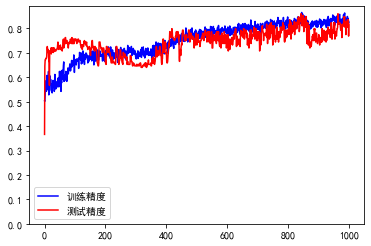

In [13]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0 )
plt.legend()

很明显：“训练图”和“测试图”一直靠的很近！说明网络没有过拟合；并且测试集的结果比之前过拟合时更好了！

（回顾：过拟合最大表现就是“训练图”和“测试图”差距很大，且没有缩小差距的趋势）

注意：
- 每一次使用dropout后，由于每次训练网络都有很大单元死掉，因此总训练轮次epochs要比原始网络多（要大比较多）！
- 因为有了dropout，模型精度的上涨速度就会变得较为平缓！不是原先大网络下的跳变增加。